In [1]:
# Using Drive as storage and github for version controll.

from google.colab import drive, userdata
import os

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Setup Paths (Change to your actual repo name)
REPO_PATH = "/content/drive/MyDrive/ML/DL_With_Pytorch"
%cd {REPO_PATH}

# 3. Secure Auth
token = userdata.get('GH_TOKEN')
username = "barada02"
repo = "DL_With_Pytorch"
!git remote set-url origin https://{token}@github.com/{username}/{repo}.git

# 4. Identity
!git config --global user.email "Chandanbarada2@gmail.com"
!git config --global user.name "Kumar"

!git pull origin main
print("✅ Environment Ready!")

Mounted at /content/drive
/content/drive/MyDrive/ML/DL_With_Pytorch
From https://github.com/barada02/DL_With_Pytorch
 * branch            main       -> FETCH_HEAD
Already up to date.
✅ Environment Ready!


# Tensor Shapes

Manipulating tensor shapes is the bread and butter of deep learning. In PyTorch, these operations allow you to reorganize data to fit the expected input of different layers (like moving from a Convolutional layer to a Linear one)

In [6]:
import torch
torch.__version__


'2.9.0+cpu'

# The flatten
### Reshape and view

Both change the dimensions of a tensor without changing its data, but they handle memory differently.

* view(): The OG method. It is very fast because it creates a "view" of the original data without copying it. Requirement: The tensor must be contiguous in memory. If you’ve just transposed a tensor, view() might throw an error.

* reshape(): The more robust sibling. It tries to return a view if possible, but if the data isn't contiguous, it will silently copy the data to a new memory block.

> **`Pro Tip:` Use -1 as a dimension to let PyTorch automatically calculate the size for that slot based on the remaining dimensions.**

In [8]:


# A batch of 4 images, 3 color channels, 28x28 pixels
x = torch.randn(4, 3, 28, 28)
print(f"Original shape: {x.shape}")

# Use -1 to say: "Keep the batch size (4), but squash everything else"
flattened = x.view(4, -1)
print(f"Flattened shape: {flattened.shape}") # [4, 2352]

Original shape: torch.Size([4, 3, 28, 28])
Flattened shape: torch.Size([4, 2352])


> **You will use this constantly when moving from Convolutional layers (3D) to Linear layers (1D).**




# Squeeze and Unsqueeze
These are used to add or remove "singleton" dimensions (dimensions of size 1).

* ```unsqueeze(dim)```: Adds a dimension of size 1 at the specified index.

  * Example: Changing a shape from [3, 224, 224] to [1, 3, 224, 224] to add a "batch" dimension.

* ```squeeze(dim)```: Removes a dimension of size 1. If no dimension is specified, it removes all dimensions of size 1.

   * Example: Changing [1, 10] to [10].

> **PyTorch models usually expect a Batch dimension. If you have a single image, you have to "fake" a batch of one.**

In [11]:
# A single RGB image
img = torch.randn(3, 224, 224)
print(f"Single image: {img.shape}")

# Add a batch dimension at index 0
batch_img = img.unsqueeze(0)
print(f"After unsqueeze(0): {batch_img.shape}") # [1, 3, 224, 224]

# Remove it back
back_to_img = batch_img.squeeze(0)
print(f"After squeeze(0): {back_to_img.shape}")

Single image: torch.Size([3, 224, 224])
After unsqueeze(0): torch.Size([1, 3, 224, 224])
After squeeze(0): torch.Size([3, 224, 224])


# 3. Transpose and Permute
These operations swap the axes of the tensor.

* transpose(dim0, dim1): Swaps exactly two dimensions. This is common in NLP or for simple matrix flips.

* permute(dims): A more powerful version of transpose that can reorder any number of dimensions at once.

  * Example: Converting an image from HWC (Height, Width, Channels) to CHW format: tensor.permute(2, 0, 1).

In [16]:
# Typical PyTorch tensor: [Channels, Height, Width]
img_tensor = torch.randn(3, 128, 128)

# Permute to [Height, Width, Channels] for plotting
img_for_plt = img_tensor.permute(1, 2, 0)
print(f"Permuted for plotting: {img_for_plt.shape}") # [128, 128, 3]

# Transpose is usually for just two specific dims
weight_matrix = torch.randn(10, 5)
transposed = weight_matrix.transpose(0, 1)
print(f"Transposed matrix: {transposed.shape}") # [5, 10]

Permuted for plotting: torch.Size([128, 128, 3])
Transposed matrix: torch.Size([5, 10])


> **This is vital because libraries like Matplotlib expect images in (H, W, C) format, but PyTorch uses (C, H, W).**

## Random tensor to image

tensor([[[0.5339, 0.1701, 0.7149, 0.6114, 0.0241, 0.2133, 0.8245],
         [0.1234, 0.4643, 0.4225, 0.9595, 0.9239, 0.6427, 0.8463],
         [0.7191, 0.9437, 0.3362, 0.4947, 0.6761, 0.2072, 0.5605],
         [0.1133, 0.7685, 0.5294, 0.1786, 0.1817, 0.0521, 0.6990],
         [0.0429, 0.1854, 0.4721, 0.5213, 0.6097, 0.4637, 0.6590],
         [0.9388, 0.4291, 0.8725, 0.8574, 0.5778, 0.5121, 0.8953],
         [0.1561, 0.9382, 0.0415, 0.6093, 0.0617, 0.2916, 0.3687]],

        [[0.3339, 0.7196, 0.2785, 0.6824, 0.6971, 0.4927, 0.1587],
         [0.4449, 0.0468, 0.3031, 0.6979, 0.8752, 0.8994, 0.8754],
         [0.1522, 0.6897, 0.2659, 0.1023, 0.5379, 0.2059, 0.1105],
         [0.3277, 0.7597, 0.6443, 0.5257, 0.7569, 0.1005, 0.7972],
         [0.0952, 0.2559, 0.1362, 0.3559, 0.4365, 0.1276, 0.9333],
         [0.6111, 0.5863, 0.5758, 0.3050, 0.8233, 0.5202, 0.4542],
         [0.0211, 0.9589, 0.0735, 0.5307, 0.9761, 0.1252, 0.9021]],

        [[0.8928, 0.7587, 0.7667, 0.0129, 0.0530, 0.1921, 

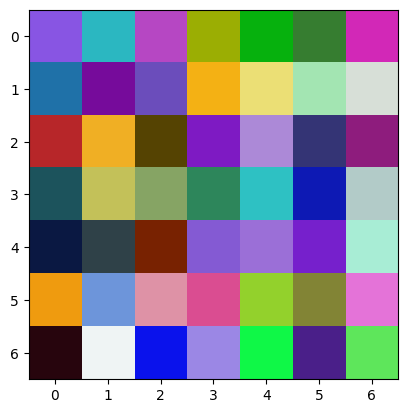

In [42]:
import torch
import matplotlib.pyplot as plt

# 1. Generate a random tensor [Channels, Height, Width]
# Values will be between 0 and 1
random_image_tensor = torch.rand(3, 7, 7)
print(random_image_tensor)
# 2. Matplotlib expects [Height, Width, Channels]
# We use .permute() to swap the axes around
vis_tensor = random_image_tensor.permute(1, 2, 0)

# 3. Display it
plt.imshow(vis_tensor)
plt.show()

# Erro Scopido
## The "Contiguous" Trap

If you see the error RuntimeError: view size is not compatible with input tensor's size and stride, it's because you tried to view a tensor after transposing it.

#### **The Fix:**

In [ ]:
# This might crash
# y = img_tensor.transpose(1, 2).view(-1)

# This will always work
y = img_tensor.transpose(1, 2).contiguous().view(-1)

**Why?** `transpose` doesn't move data in memory; it just changes how we look at it. `view` requires the data to be physically lined up in order. `contiguous()` forces PyTorch to copy the data into a clean, ordered block.



## 🚀 PyTorch Tensor Shape Cheat Sheet

| Operation | Syntax | What it does | Real-world Use Case |
| --- | --- | --- | --- |
| **View** | `x.view(shape)` | Changes shape (must be contiguous). | Flattening features before a Linear layer. |
| **Reshape** | `x.reshape(shape)` | Changes shape (copies data if needed). | Same as view, but "safer" and slightly slower. |
| **Unsqueeze** | `x.unsqueeze(dim)` | Adds a dimension of size 1 at `dim`. | Converting a single image into a "batch of 1". |
| **Squeeze** | `x.squeeze(dim)` | Removes dimension(s) of size 1. | Removing the batch dimension after inference. |
| **Transpose** | `x.transpose(d1, d2)` | Swaps two specific dimensions. | Flipping height and width or matrix math. |
| **Permute** | `x.permute(dims)` | Reorders all dimensions at once. | Converting Image format: `(C, H, W)`  `(H, W, C)`. |

---

###  Pro-Tips for  Coding

* **The `-1` Trick:** Use `x.view(batch_size, -1)` to let PyTorch calculate the remaining dimension automatically.
* **The Error Fixer:** If you get a memory error after transposing, chain `.contiguous()` before your next operation.
* **Debug often:** Use `print(x.shape)` after every transformation to ensure your "mental model" matches the code.



# Pro

# 1. expand() vs. repeat()

These are used when you want to make a tensor "larger" by copying data.

* `expand()`: Does not use extra memory. It creates a new view that looks like the data is repeated. It only works on dimensions of size 1.

* `repeat()`: Actually copies the data in memory. It's "expensive" compared to expand.

In [27]:
x = torch.tensor([[1], [2], [3]]) # Shape [3, 1]

# Expand to [3, 4] - effectively 0 extra memory
expanded = x.expand(3, 4)

# Repeat to [3, 4] - physically copies data 4 times
repeated = x.repeat(1, 4)

In [29]:
print(expanded)


tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])


In [30]:
print(repeated)

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])


# 2. flatten()
While `view(batch, -1)` is common, `torch.flatten()` is cleaner when you want to squash a specific range of dimensions.

In [34]:
# [Batch, Channel, Height, Width]
x = torch.randn(32, 3, 224, 224)

# Flatten only the spatial/channel dims, keep batch (dim 0)
# Start at dim 1, go to the end
flat = torch.flatten(x, start_dim=1)
print(flat.shape) # [32, 150528]

torch.Size([32, 150528])


# 3. stack() vs. cat()
This is the #1 source of confusion for beginners.

* `cat()` **(Concatenate)**: Joins tensors along an existing dimension. The shape stays the same rank (e.g., 2D stays 2D).

* `stack()`: Joins tensors along a new dimension. It increases the rank (e.g., a list of 2D tensors becomes one 3D tensor).

In [36]:
t1 = torch.randn(224, 224)
t2 = torch.randn(224, 224)

# cat: [448, 224] - Glue them together
concatenated = torch.cat([t1, t2], dim=0)

# stack: [2, 224, 224] - Put one on top of the other
stacked = torch.stack([t1, t2], dim=0)

# Right Question
Before you close your Colab, ask yourself:

1. Do I need to move data? (If yes, use `reshape` or `repeat`).

2. Is this a "view"? (If yes, remember `contiguous()` might be needed later).

3. Am I adding a new axis? (Use `unsqueeze` or `stack`).

# Github commit and push

In [43]:
# Push notebook changes to GitHub
# IMPORTANT: Press Ctrl+S (Save) before running this!
!git add .
!git commit -m "Random Tensor to image"
!git push origin main

[main 70ac780] Random Tensor to image
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 6.59 KiB | 482.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/barada02/DL_With_Pytorch.git
   715c352..70ac780  main -> main
